In [1]:
#import the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset.csv")
print("Dataset Shape:", data.shape)


Dataset Shape: (250, 8)


In [3]:
print(data.columns)

Index(['Age', 'Annual Income', 'Spending Score', 'Gender', 'Location',
       'Family Size', 'Occupation', 'Education'],
      dtype='object')


In [4]:
print(data.size)

2000


In [5]:
#data preprocessing using label encoding
from sklearn.preprocessing import LabelEncoder,StandardScaler

obj=LabelEncoder()
data['Gender']=obj.fit_transform(data['Gender'])
data['Location']=obj.fit_transform(data['Location'])
data['Occupation']=obj.fit_transform(data['Occupation'])
data['Education']=obj.fit_transform(data['Education'])

# Data preprocessing using label encoding
# le = LabelEncoder()
# categorical_columns = ['Gender', 'Location', 'Occupation', 'Education']
# for col in categorical_columns:
#     data[col] = le.fit_transform(data[col])


In [6]:
# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data)
features_df = pd.DataFrame(features_scaled, columns=data.columns)

In [7]:
features_df

,Age,Annual Income,Spending Score,Gender,Location,Family Size,Occupation,Education
0,1.368290,0.359492,-1.239574,-1.0,-1.074789,-0.254442,-0.090085,-0.686878
1,0.577005,-0.960610,1.496569,1.0,-1.074789,-0.254442,-1.113772,1.415811
2,-0.530794,0.780383,-1.543590,-1.0,-1.074789,1.480387,0.933603,0.714914
3,-1.084694,1.514264,-0.530204,1.0,0.930415,-1.410994,0.933603,0.714914
4,-0.056023,-1.472113,1.226333,-1.0,0.930415,0.323835,1.445447,-1.387775
...,...,...,...,...,...,...,...,...
245,1.210033,-0.382408,-1.138236,1.0,0.930415,1.480387,-1.113772,-1.387775
246,0.814391,-1.637155,1.124994,-1.0,-1.074789,1.480387,-0.090085,-1.387775
247,-1.005565,-0.653573,1.260112,-1.0,0.930415,-0.832718,-1.113772,0.014018
248,1.526547,-0.646659,0.618301,-1.0,0.930415,0.323835,-0.090085,1.415811


In [8]:
features_df.columns

Index(['Age', 'Annual Income', 'Spending Score', 'Gender', 'Location',
       'Family Size', 'Occupation', 'Education'],
      dtype='object')

In [9]:
features_df.size

2000

In [10]:
features_df.shape

(250, 8)

In [11]:
features_df.head(10)
features_df.tail(4)
features_df.sample(7)

,Age,Annual Income,Spending Score,Gender,Location,Family Size,Occupation,Education
30,-0.530794,0.427776,-1.138236,-1.0,0.930415,-0.254442,-0.090085,1.415811
55,-1.242951,-0.121038,0.348064,1.0,-1.074789,-1.410994,-1.113772,-0.686878
171,0.181363,-0.200654,-0.935558,-1.0,-1.074789,-1.410994,-1.625616,-0.686878
34,-0.056023,-0.851221,-1.577370,1.0,-1.074789,1.480387,-0.601928,1.415811
4,-0.056023,-1.472113,1.226333,-1.0,0.930415,0.323835,1.445447,-1.387775
95,1.605676,-1.044548,1.226333,-1.0,-1.074789,-0.254442,0.421759,-0.686878
207,-0.451665,1.457601,-1.138236,1.0,0.930415,-0.832718,-1.625616,-0.686878


Text(0.5, 1.0, 'using correlation matrix ')

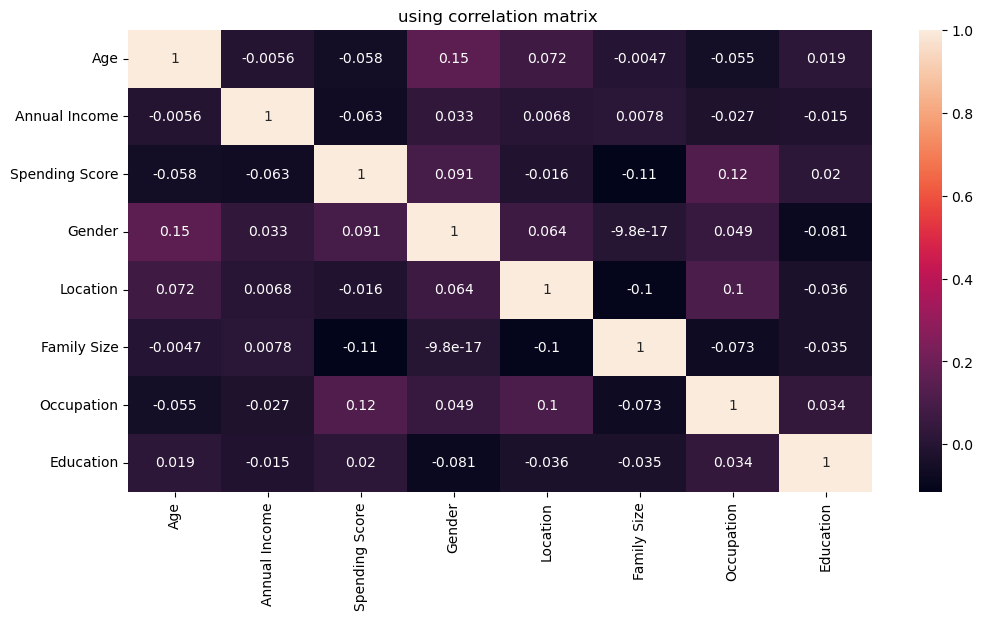

In [12]:
#feature selection
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.title("using correlation matrix ")


In [13]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, SpectralClustering

selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(features_df, data['Spending Score'])
selected_features_mask = selector.get_support()
selected_feature_names = features_df.columns[selected_features_mask]
print("Most significant features:", selected_feature_names)

Most significant features: Index(['Annual Income', 'Spending Score', 'Location', 'Family Size'], dtype='object')


c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [14]:
# 2ndPCA
pca = PCA()
X_pca = pca.fit_transform(features_df)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(len(explained_variance))

8


Text(0.5, 1.0, 'PCA-CumulativeEVR')

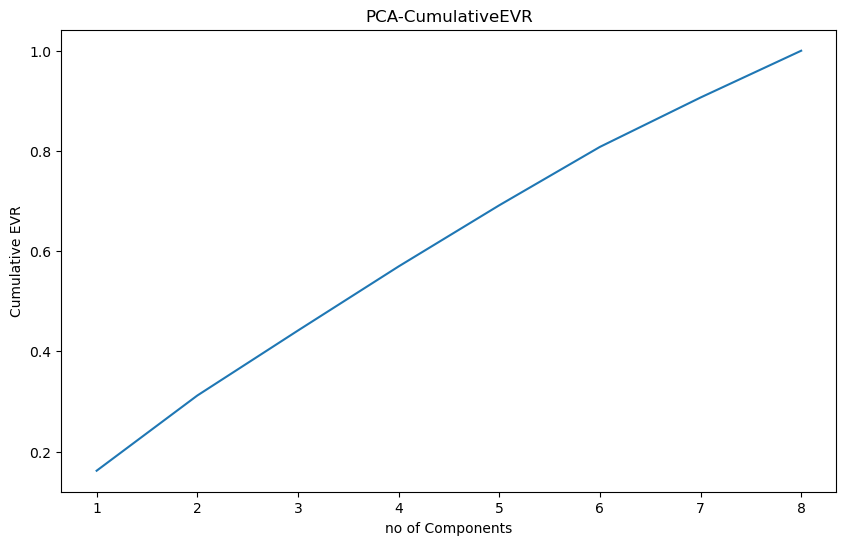

In [15]:

plt.figure(figsize=(10, 6))
r=range(1, len(explained_variance) + 1) #1,9 inclusive,exclusive
plt.plot(r, cumulative_variance)
plt.xlabel('no of Components')
plt.ylabel('Cumulative EVR')
plt.title('PCA-CumulativeEVR')

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, SpectralClustering

selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(features_df, data['Spending Score'])
selected_features_mask = selector.get_support()
selected_feature_names = features_df.columns[selected_features_mask]
print("Most significant features:", selected_feature_names)

Most significant features: Index(['Annual Income', 'Spending Score', 'Location', 'Family Size'], dtype='object')


c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [17]:
# 2ndPCA
pca = PCA()
X_pca = pca.fit_transform(features_df)
explained_variance = pca.explained_variance_ratio_ #variances blw the pc explained "how"
cumulative_variance = np.cumsum(explained_variance) #total variances
print(len(explained_variance))

8


Text(0.5, 1.0, 'PCA-CumulativeEVR')

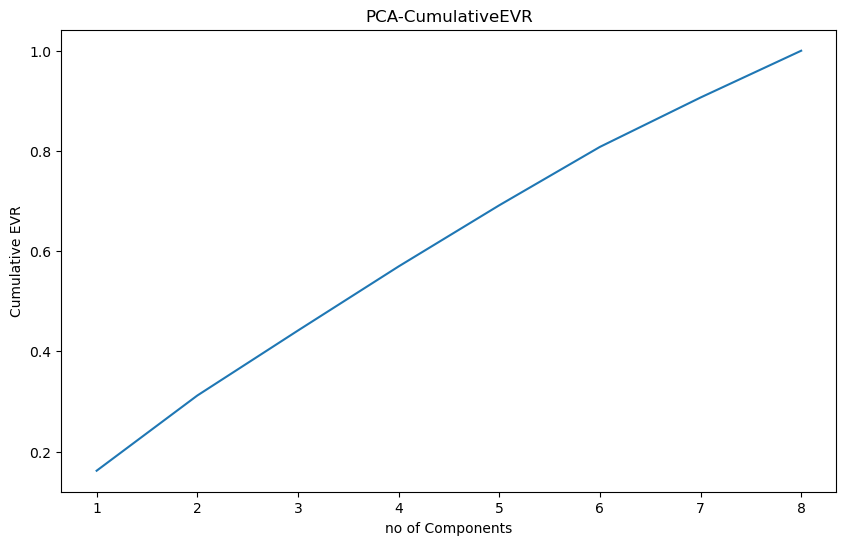

In [18]:

plt.figure(figsize=(10, 6))
r=range(1, len(explained_variance) + 1) #1,9 inclusive,exclusive
plt.plot(r, cumulative_variance)
plt.xlabel('no of Components')
plt.ylabel('Cumulative EVR')
plt.title('PCA-CumulativeEVR')

In [19]:
# no of cluster analysis
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [20]:
# K-Means for different cluster numbers
K = range(2, 11)  # testing clusters from 2 to 10
inertias = []  # for K-Means elbow methodfor within clustering we can use ss
silhouette_scores = []  # for measuring cluster quality

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(features_df)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_df, kmeans_labels))

c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

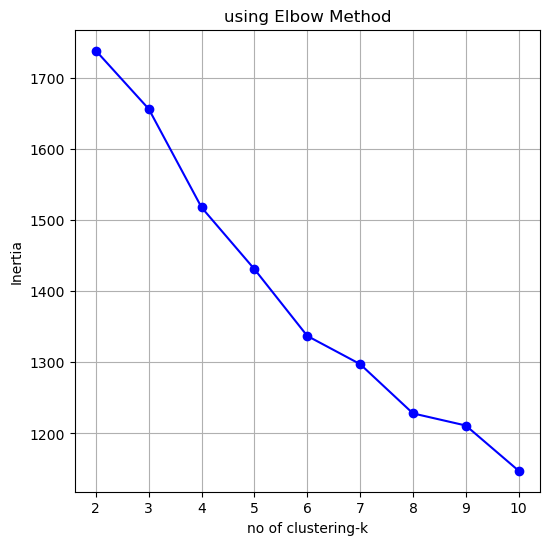

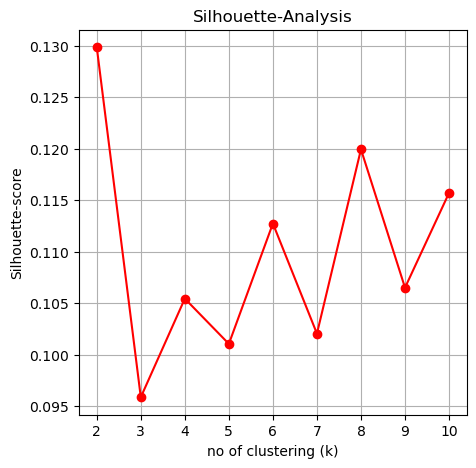

In [21]:
#elbow Method
plt.figure(figsize=(6,6))
plt.plot(K, inertias, 'bo-')
plt.xlabel('no of clustering-k')
plt.ylabel('Inertia')
plt.title('using Elbow Method')
plt.grid(True)
plt.show()

#Silhouette Analysis
plt.figure(figsize=(5,5))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('no of clustering (k)')
plt.ylabel('Silhouette-score')
plt.title('Silhouette-Analysis')
plt.grid(True)
plt.show()

In [22]:
#apply clustering with optimal k 
k_optimal = 3

#apply different clustering methods
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=k_optimal)
birch = Birch(n_clusters=k_optimal)

print(kmeans)
print(hierarchical)
print(birch)

KMeans(n_clusters=3, random_state=42)
AgglomerativeClustering(n_clusters=3)
Birch()


In [23]:
#cluster labels
kmeans_labels = kmeans.fit_predict(features_df)
hierarchical_labels = hierarchical.fit_predict(features_df)
birch_labels = birch.fit_predict(features_df)

c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
# evaluate and compare methods
def evaluate_clustering(data, labels, method_name):
    score = silhouette_score(data, labels)
    print(f"{method_name} Silhouette Score: {score:.3f}")


print("clustering quality evaluation:")
evaluate_clustering(features_df, kmeans_labels, "K-Means")
evaluate_clustering(features_df, hierarchical_labels, "Hierarchical")
evaluate_clustering(features_df, birch_labels, "BIRCH")




clustering quality evaluation:
K-Means Silhouette Score: 0.096
Hierarchical Silhouette Score: 0.095
BIRCH Silhouette Score: 0.083


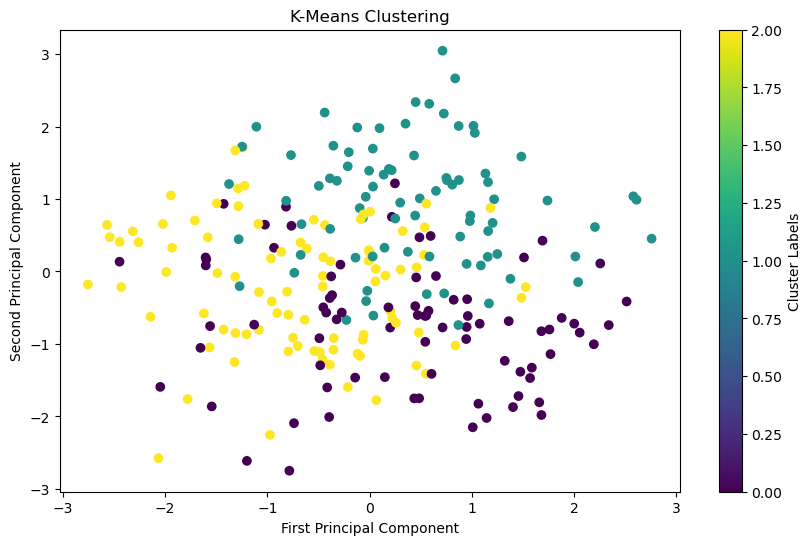

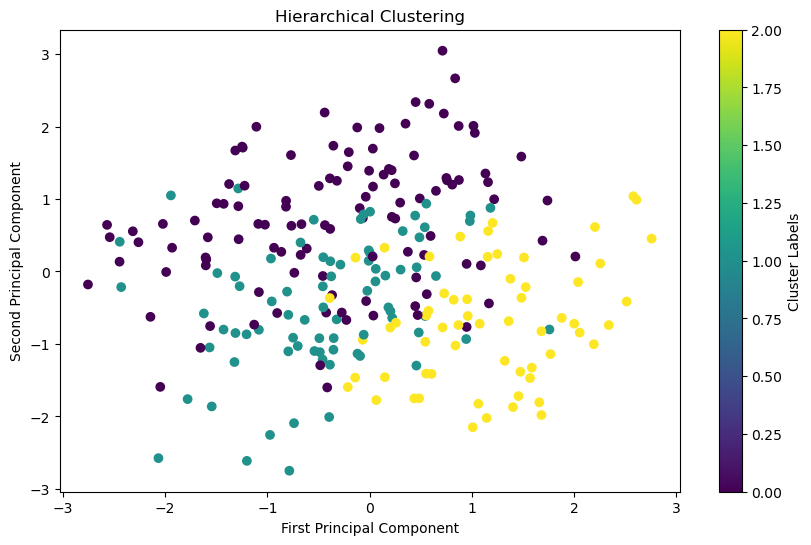

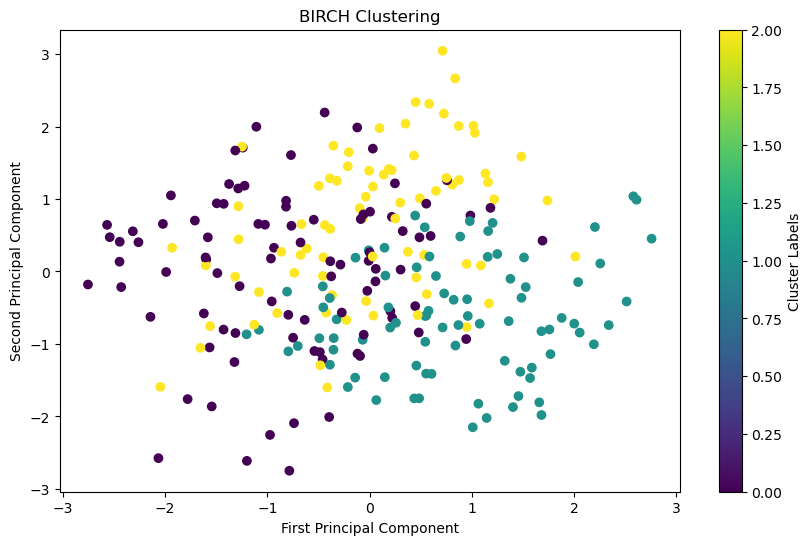

In [25]:
#visual
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_df)

# K-Means
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster Labels')
plt.show()


#hierarchical
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster Labels')
plt.show()

# BIRCH
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=birch_labels, cmap='viridis')
plt.title('BIRCH Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster Labels')
plt.show()

In [26]:
#evaluation Metrics
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_detailed(data, labels, method_name):
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    davies = davies_bouldin_score(data, labels)
    
    print(f"\nDetailed Evaluation for {method_name}:")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Calinski-Harabasz Score: {calinski:.3f}")
    print(f"Davies-Bouldin Score: {davies:.3f}")
    return silhouette, calinski, davies

# evaluate each method with detailed metrics
results = {}
for method, labels in [("K-Means", kmeans_labels), 
                      ("Hierarchical", hierarchical_labels),
                      ("BIRCH", birch_labels)]:
    results[method] = evaluate_clustering_detailed(features_df, labels, method)

# Print comparative analysis
print("\nComparative Analysis:")
print("Based on the evaluation metrics:")
print("1.silhouette Score: Higher is better (range: -1 to 1)")
print("2.calinski-Harabasz Score: Higher is better")
print("3.davies-Bouldin Score: Lower is better")

# Determine best method
best_silhouette = max(results.items(), key=lambda x: x[1][0])
print("presenting the list best_silhouette :",best_silhouette)
print(f"\nbest performing method based on Silhouette score: {best_silhouette[0]}")


##conclusion part
print("1.feature Selection identified the following key features:", list(selected_feature_names))
print("2.optimal number of clusters based on Elbow method:", k_optimal)
print("3.best performing clustering method:", best_silhouette[0])



Detailed Evaluation for K-Means:
Silhouette Score: 0.096
Calinski-Harabasz Score: 25.607
Davies-Bouldin Score: 2.557

Detailed Evaluation for Hierarchical:
Silhouette Score: 0.095
Calinski-Harabasz Score: 26.549
Davies-Bouldin Score: 2.536

Detailed Evaluation for BIRCH:
Silhouette Score: 0.083
Calinski-Harabasz Score: 23.497
Davies-Bouldin Score: 2.749

Comparative Analysis:
Based on the evaluation metrics:
1.silhouette Score: Higher is better (range: -1 to 1)
2.calinski-Harabasz Score: Higher is better
3.davies-Bouldin Score: Lower is better
presenting the list best_silhouette : ('K-Means', (0.09586237556192426, 25.607180550441758, 2.5568902549578847))

best performing method based on Silhouette score: K-Means
1.feature Selection identified the following key features: ['Annual Income', 'Spending Score', 'Location', 'Family Size']
2.optimal number of clusters based on Elbow method: 3
3.best performing clustering method: K-Means
